In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [17]:
Categories=['apple','banana']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='train'
#path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

loading... category : apple


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


loaded category:apple successfully
loading... category : banana
loaded category:banana successfully


In [18]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(143, 67501)

In [19]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [20]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,
                                               stratify=y)

In [21]:

# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [22]:
# Training the model using the training data
model.fit(x_train,y_train)

In [ ]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 89.65517241379311% accurate


In [ ]:
print(classification_report(y_test, y_pred, target_names=['apple', 'banana']))

              precision    recall  f1-score   support

       apple       0.87      0.93      0.90        14
      banana       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [ ]:
def predict_img(path):
  img=imread(path)
  plt.imshow(img)
  plt.show()
  img_resize=resize(img,(150,150,3))
  l=[img_resize.flatten()]
  probability=model.predict_proba(l)
  for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
  print("The predicted image is : "+Categories[model.predict(l)[0]])

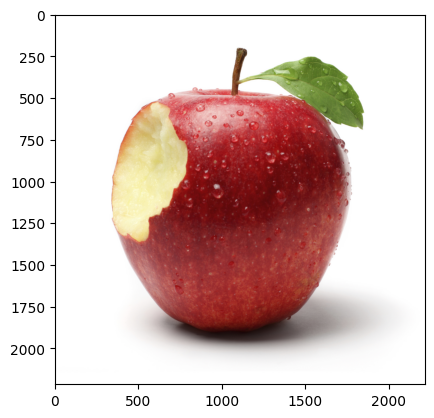

apple = 99.91477449790803%
banana = 0.08522550209197269%
The predicted image is : apple


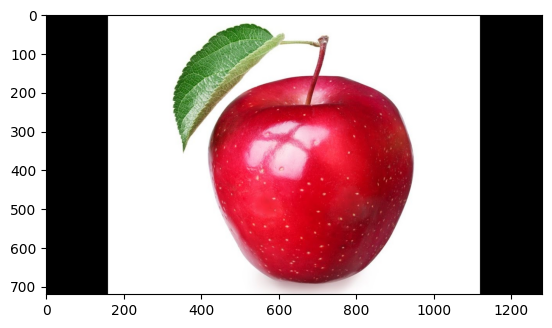

apple = 88.55003432014013%
banana = 11.449965679859881%
The predicted image is : apple


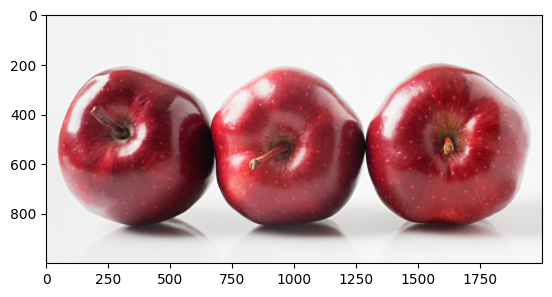

apple = 85.0123802669726%
banana = 14.987619733027396%
The predicted image is : apple


In [ ]:
predict_img('valid/apple/Image_1.jpg')
predict_img('valid/apple/Image_2.jpg')
predict_img('valid/apple/Image_3.jpg')
